In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

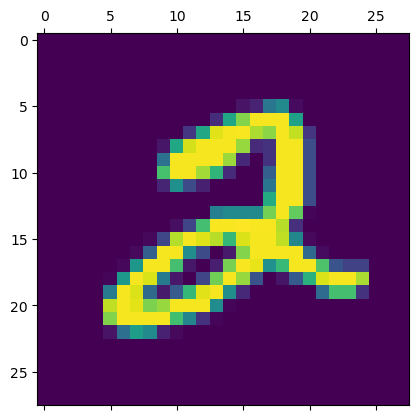

In [5]:
plt.matshow(X_train[5]);

In [6]:
y_train[5]

2

## Scaling

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Building

In [13]:

model=keras.models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )


model.fit(X_train,y_train,epochs=11)




Epoch 1/11


1875/1875 [==============================] - 26s 13ms/step - loss: 0.1565 - accuracy: 0.9528
Epoch 2/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0533 - accuracy: 0.9838
Epoch 3/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0372 - accuracy: 0.9886
Epoch 4/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 5/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 6/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 7/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 8/11
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 9/11
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 10/11
1875/1875 [==============================] - 23

## Evaluate the Model

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0378 - accuracy: 0.9909


[0.037803489714860916, 0.9908999800682068]

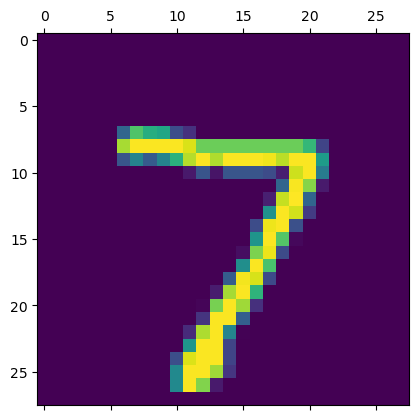

In [15]:
plt.matshow(X_test[])

In [16]:
y_predicted=model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [17]:
y_predicted[0]

array([8.45239937e-12, 3.59989538e-11, 2.34271214e-10, 1.80230864e-09,
       1.85522101e-11, 1.37124242e-12, 1.05921576e-16, 9.99999762e-01,
       1.44784349e-11, 2.87314577e-07], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_pred=[np.argmax(i) for i in y_predicted]

In [20]:
y_pred[:5]

[7, 2, 1, 0, 4]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    1,    0,    0,    1],
       [   1, 1130,    2,    0,    0,    2,    0,    0,    0,    0],
       [   2,    0, 1025,    1,    1,    0,    0,    3,    0,    0],
       [   0,    0,    1,  997,    0,    3,    0,    4,    4,    1],
       [   0,    0,    1,    0,  977,    0,    1,    0,    0,    3],
       [   1,    0,    0,    3,    0,  884,    1,    0,    2,    1],
       [   4,    3,    2,    0,    3,    4,  939,    0,    3,    0],
       [   0,    2,    1,    0,    1,    1,    0, 1014,    0,    9],
       [   1,    0,    0,    1,    1,    2,    0,    2,  965,    2],
       [   0,    0,    0,    0,    4,    4,    0,    0,    1, 1000]])>

Text(95.72222222222221, 0.5, 'Truth')

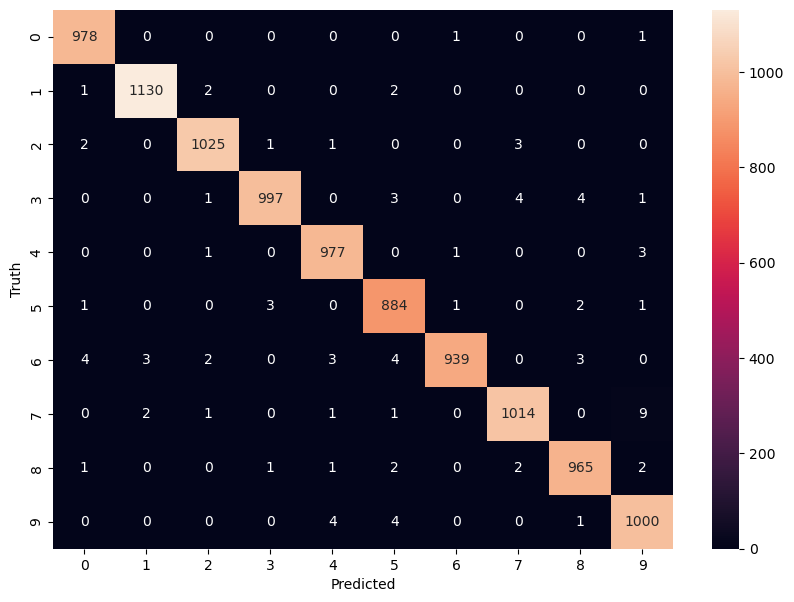

In [22]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')